In [1]:
import numpy as np
import scipy.io as scio
from scipy.interpolate import CubicSpline

In [2]:
tissue = scio.loadmat('../Data/tissue3_1.mat')
data   = tissue['map_t3']
signal = data[50,50,:]

calibration = scio.loadmat('../Data/cal_14.mat')
x = calibration['Cal'][0][0][0]
x = [item for sublist in x for item in sublist]

In [21]:
def rubber_band(signal):
    # Divide into sections and get min value
    intervals = int(1024/64)
    min_index = np.zeros(intervals)
    min_value = np.zeros(intervals)
    
    for i in range(intervals):
        min_index[i] = np.argmin(signal[64*i:64*i+63]) + 64*i
        min_value[i] = np.amin(signal[64*i:64*i+63])
        
    # Add more precise start/end
    s_index = np.argmin(signal[0:7])
    s_value = np.amin(signal[0:7])
    e_index = np.argmin(signal[1016:1023]) + 1016
    e_value = np.amin(signal[1016:1023])
    
    if s_index not in min_index:
        min_index = np.insert(min_index,0,s_index)
        min_value = np.insert(min_value,0,s_value)
    if e_index not in min_index:
        min_index = np.append(min_index,e_index)
        min_value = np.append(min_value,e_value)
    
    # Fit and remove spline
    cs = CubicSpline(min_index, min_value)
    x = [i for i in range(1024)]
    no_baseline = signal - cs(x)

    return no_baseline

In [23]:
res = rubber_band(signal)

Text(0.5, 0, 'Raman shift [cm-1]')

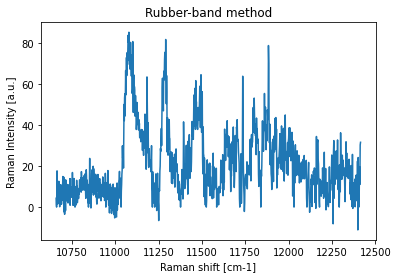

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(x,res)
plt.title('Rubber-band method')
plt.ylabel('Raman Intensity [a.u.]')
plt.xlabel('Raman shift [cm-1]')